# Equations de Lotka-Volterra

## Guillaume Rouy & Inès Fontaine

On introduit les fonctions $x_1 : I \subset \mathbb{R} \longrightarrow \mathbb{R}^+$ et $x_2 : I \subset \mathbb{R} \longrightarrow \mathbb{R}^+$ représentant respectivement le nombre de proies et de prédateurs à chaque instant. Le système de Lotka-Volterra, avec quatre réels strictement positifs $\alpha$, $\beta$, $\gamma$, et $\delta$, est donné par :


$$
\left\{ \begin{array}{cl}
\overset{.}{x_1} = x_1 (\alpha - \beta x_2) \\
\overset{.}{x_2} = -x_2 (\gamma - \delta x_1)
\end{array} \right.
$$

On pose donc le vecteur $x=(x_1,x_2)$ et la fonction $f : (x_1,x_2) \in \mathbb{R}^2 \longrightarrow (x_1 (\alpha - \beta x_2),-x_2 (\gamma - \delta x_1))\in \mathbb{R}^2$ de manière à ce que le système devienne simplement l'équation $\overset{.}{x} = f(x)$.

### Question 1

#### Interprétation des coefficients

Hypothèses :
- Les proies ont une source de nourriture illimitée
- Les proies ne peuvent mourir qu'à cause des prédateurs
- Les prédateurs ne peuvent se nourrir que des proies
- Les prédateurs meurent naturellement

Ainsi :
- Le nombre de proies augmente naturellement par reproduction : taux de reproduction $\alpha$ sans couplage ($\alpha x_1$)
- Le nombre de proies diminue car ils sont chassés par les prédateurs : taux de chasse $\beta$ avec couplage ($-\beta x_1 x_2$)
- Le nombre de prédateurs diminue naturellement : taux de décès $\gamma$ sans couplage ($-\gamma x_2$)
- Le nombre de prédateurs augmente si leur nourriture est abondante : taux de reproduction $\delta$ avec couplage ($\delta x_1 x_2$)

### Points d'équilibre

Les points d'équlibre sont donnés par la résolution du système $f(x1,x2)=0$. On trouve deux points, $O$ et $\overline{x}$ :
$$
\left\{ \begin{array}{cl}
O = (0,0) \\
\overline{x} = (\frac{\delta}{\gamma},\frac{\alpha}{\beta})
\end{array} \right.
$$

#### Stabilité : méthode du linéarisé tangent

La jacobienne de la fonction $f$ est donnée par :
$$
J_f (x_1,x_2) =\begin{pmatrix}
\alpha -\beta x_2 & \beta x_1 \\
-\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}
$$

Ainsi, en l'évaluant aux points d'équilibres :

- $
J_f (0,0) = \begin{pmatrix}
\alpha & 0 \\
0 & -\gamma 
\end{pmatrix}
$ possède une valeur propre de partie réelle strictement positive ($\alpha$), donc le point d'équilibre (0,0) est instable.

- $
J_f (\frac{\delta}{\gamma},\frac{\alpha}{\beta}) = \begin{pmatrix}
0 & \beta \frac{\delta}{\gamma} \\
-\delta \frac{\alpha}{\beta} & 0
\end{pmatrix}
$ admet un polynôme caractéristique $X^2 + \delta^2 = (X-i\delta)(X+i\delta)$. Le cours ne permet pas de conclure sur la stabilité de $\overline{x}$.

### Question 2

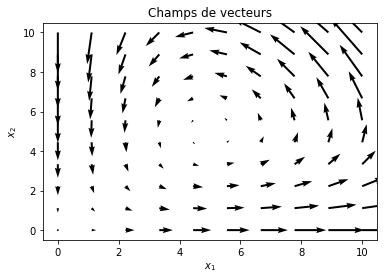

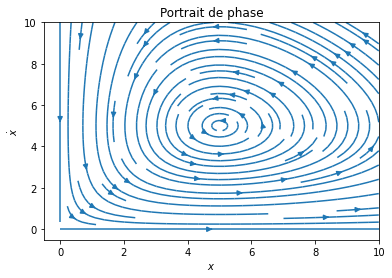

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients de prédation
a = 5
b = 1
g = 5
d = 1

# Intervalles
x1 = np.linspace(0,10,10)
x2 = np.linspace(0,10,10)

def f1(x1,x2):
    return x1*(a - b*x2)

def f2(x1,x2):
    return -x2*(g-d*x1)

X, Y = np.meshgrid(x1, x2)
U = f1(X,Y)
V = f2(X,Y)

# quiver
plt.quiver(X,Y,U,V)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Champs de vecteurs')

plt.show()

# streamplot
plt.streamplot(X,Y,U,V)
plt.ylabel('$\dot{x}$')
plt.xlabel('$x$')
plt.title('Portrait de phase')

plt.show()


On observe que pour le point $\overline{x}$, le portrait de phase semble montrer des courbes fermées. Ce point semble donc stable mais non pas attractif (analogie avec un pendule non amorti).

### Question 3

Soit $x_0 = (x_{10},x_{20})$ la condition initiale du système en $t=t_0$. Comme $f$ est de classe $\mathcal{C}^1$, le théorème de Cauchy-Lipschitz assure l'existence d'une unique solution maximale $x=(x_1,x_2)$ sur $I$ ouvert contenant un voisinage de $t_0$.

Montrons que pour tout si, $x_0 = (x_{10},x_{20}) \in {{\mathbb{R}^{*}_+}}^2 $, alors $t \ge t_0$, $x(t) \in {{\mathbb{R}^{*}_+}}^2$.

Supposons que $x_0 = (x_{10},x_{20}) \in {{\mathbb{R}^{*}_+}}^2 $ et qu'il existe $T$ tel que $x(T)=(0,x_2(T))$. Alors $\forall t \gt T, x(t)=(0,x_{2}(T) e^{-\gamma (t-T)})$ est une solution. Par unicité, c'est l'unique solution.

Considérons maintenant le problème de Cauchy de condition initiale $x^{*} = x(T) = (0, x_2^{*})$, il admet donc une solution qui vaut $x_0$ au temps $t_0$ et $\forall t \gt T, x(t)=(0,x_{2}(T) e^{-\gamma (t-T)})$. 

Mais il existe une autre solution, $x(t) = (0, x_{2}^{*} e^{-\gamma (t-T)} ),  \forall t \in I$, ce qui est impossible par unicité. 

En raisonnant de manière analogue pour $x_{2}$, on obtient donc que si $x_0 = (x_{10},x_{20}) \in {{\mathbb{R}^{*}_+}}^2 $, alors $t \ge t_0$, $x(t) \in {{\mathbb{R}^{*}_+}}^2$.



### Question 4

#### Conservation de $H$

On pose, sur ${{\mathbb{R}^{*}_+}}^2$, la quantité :
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln{x_1} + \beta x_2 - \alpha \ln{x_2}
$$
La règle de la chaine donne :
$$
\overset{.}{H}(x_1,x_2) = \delta \overset{.}{x_1} - \gamma \frac{\overset{.}{x_1}}{x_1} + \beta \overset{.}{x_2} - \alpha \frac{\overset{.}{x_2}}{x_2}
$$
Et en simplifiant à l'aide des équations différentielles :
$$
\overset{.}{H}(x_1,x_2) = 0
$$
Ainsi, la quantité $H(x_1,x_2)$ est conservée, elle reste égale à $H(x_{10},x_{20})$. C'est, en quelque sorte, l'énergie du système proie/prédateur.
$$ 
$$

#### Définition temporelle sur l'axe réel

On travaille sur l'intégrale première du mouvement :
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln{x_1} + \beta x_2 - \alpha \ln{x_2}
$$
On peut montrer que la fonction $x \in \mathbb{R_+^*} \longrightarrow \delta x- \gamma \ln{x}$ admet un minimum global en $\gamma / \delta $, qui vaut alors $m = \gamma (1-\ln{\gamma / \delta})$. On a alors, pour tout $x_1 \in \mathbb{R_+^*}$:
$$
\delta x_1 - \gamma \ln{x_1} \ge  m
$$
Et ainsi, pour tout $(x_1,x_2) \in {\mathbb{R_+^*}}^2$ : 
$$
H(x_1,x_2) \ge  m + \beta x_2 - \alpha \ln{x_2}
$$
Par ailleurs, il existe $C_2>0$ tel que $\forall x_2 \ge C_2$, $\alpha \ln{x_2} \le  \frac{\beta x_2}{2}$. Ainsi, pour $x_2 \ge C_2$ :
$$
H(x_1,x_2) \ge  m + \beta x_2 - \alpha \ln{x_2} \ge m + \beta x_2 - \frac{\beta x_2}{2} = m + \frac{\beta}{2} x_2
$$
C'est à dire :
$$
x_2 \le \frac{2}{\beta}(H(x_{10},x_{20}) - m)
$$
Or, $H(x_1,x_2)=H(x_{10},x_{20})$ est une quantité constante. Ainsi, pour tout $x_2 \in \mathbb{R_+^*}$:
$$
0 \lt x_2 \le \text{max}(C_2,\frac{2}{\beta}(H(x_{10},x_{20}) - \gamma (1-\ln{\gamma / \delta})) )
$$

Ce raisonnement peut être appliqué de la même manière pour tout $x_1\in \mathbb{R_+^*}$, pour lequel il existe $C_1>0$ tel que :
$$
0 \lt x_1 \le \text{max}(C_1,\frac{2}{\delta}(H(x_{10},x_{20}) - \alpha (1-\ln{\alpha / \beta})) )
$$

Ainsi, $\left\| f(x) \right\|$ est bornée, ce qui permet d'appliquer le critère d'existence globale, et on conclut que toute solution maximale initialisée dans ${\mathbb{R_+^*}}^2$ est définie sur $\mathbb{R}$ en entier.


### Question 5

#### Courbes de niveau de $H$

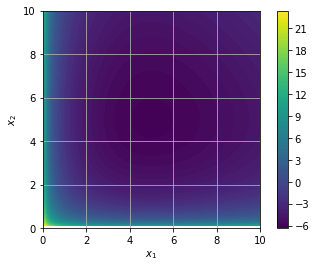

In [16]:
a = 5
b = 1
g = 5
d = 1

x1 = np.linspace(0,10,100)
x2 = np.linspace(0,10,100)

def H(x1,x2):
    return d*x1 - g*np.log(x1) + b*x2 - a*np.log(x2)

X, Y = np.meshgrid(x1, x2)
Z = H(X, Y)
fig, ax = plt.subplots()
contour_set = plt.contourf(X, Y, Z, levels=100)
plt.colorbar()
plt.grid(True)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

In [17]:
#test
# fig=plt.figure()
# ax=fig.gca(projection='3d')
# surf = ax.plot_surface(X,Y,Z)
# plt.show()

#### Stabilité du point d'équilibre $\overline{x}$ : méthode graphique

On sait que les trajectoires $t \longrightarrow (x_1(t),x_2(t))$ se font à $H(x_1,x_2)$ constant. Ainsi, les trajectoires suivent les cercles concentriques que constituent les iso-H autour du point d'équilibre $\overline{x}$. Or, on remarque que le minimum de $H$ est atteint au point d'équilibre $\overline{x}$. Ce point représente donc, à lui seul, une trajectoire du système proie/prédateur, qui est fixe. On en déduit que $\overline{x}$ est stable.

$$ 
$$

#### Stabilité du point d'équilibre $\overline{x}$ : méthode analytique

Le linéarisé tangent n'a pas permit de conclure au début. Or, pour montrer analytiquement qu'un point d'équilibre est stable, on peut aussi utiliser la caractérisation par Lyapunov. On sait que la fonction de Lyapunov est souvent représentatrice de l'énergie du système. On pose donc, pour tout $x=(x_1,x_2)\in {\mathbb{R_+^*}}^2$, $V(x)= H(x) - H(\overline{x})$. On vérifie que $V$ est une fonction de Lyapunov pour la fonction $f$ :

- $V$ est de classe $\mathcal{C}^1$ de ${\mathbb{R_+^*}}^2$ dans $\mathbb{R_+}$ (car $H$ est de classe $\mathcal{C}^1$)
- $\forall x \in {\mathbb{R_+^*}}^2, x \neq \overline{x} \Rightarrow  V(x)>0$ (car $H(\overline{x})$ est le minimum global de $H$ )
- $V(\overline{x})=0$

Soit $x \in {\mathbb{R_+^*}}^2$. Calculons le gradient de $V$ :
$$
\nabla V(x) = (\delta - \gamma / x_1 , \beta - \alpha / x_2)
$$
Et le produit scalaire avec $f(x)$ donne :
$$
\left\langle \nabla V(x)|f(x) \right\rangle= x_1 (\delta - \gamma / x_1) (\alpha - \beta x_2) - x_2 (\beta - \alpha / x_2)( \delta x_1 - \gamma))
$$
Soit :
$$
\left\langle \nabla V(x)|f(x) \right\rangle=(\delta x_1 - \gamma)(\alpha - \beta x_2) + (\beta x_2 - \alpha)( \delta x_1 - \gamma)) = 0
$$
Ainsi, la caractérisation par Lyapunov assure que le point d'équilibre $\overline{x}$ est stable.

### Question 6

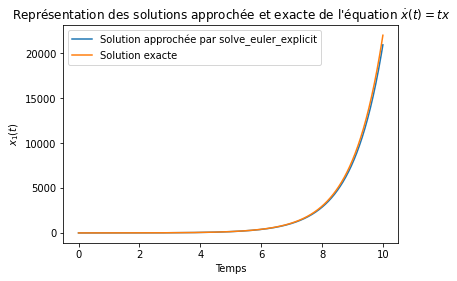

Text(0, 0.5, 'Erreur')

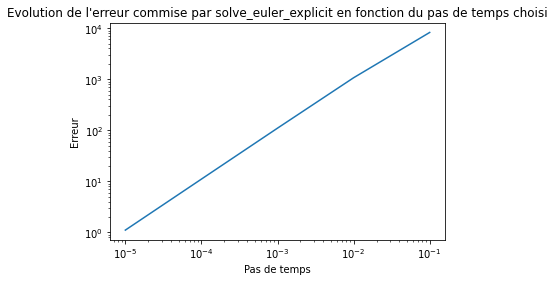

In [18]:
from math import *

def solve_euler_explicit(f, x0, dt, t0, tf):
    x =[x0]
    imax = int((tf-t0)/dt)
    i = 0
    t = [t0 + i*dt for i in range (imax+1)]
    while i < imax:
        x.append(x[i] + f(t[i], *x[i]) * dt)
        i += 1
    return (t,x)


## Test sur une fonction connue
def f1(t, x, y):
    return np.array([x, t*t*y])

time,sol = solve_euler_explicit(f1, [1,1], 0.01, 0, 10)
x1 = []
x2 = []
for x in sol:
    x1.append(x[0])
    x2.append(x[1])

x1true = [exp(t) for t in time]
x2true = [exp(t*t*t/3) for t in time]

plt.plot(time, x1, label ='Solution approchée par solve_euler_explicit')
plt.plot(time, x1true, label = 'Solution exacte')
plt.xlabel('Temps')
plt.ylabel('$x_1(t)$')
plt.title('Représentation des solutions approchée et exacte de l\'équation $\dot{x}(t) = tx$')
plt.legend()
plt.show()

## Graphe de l'erreur 
erreur = []
delta = [10**(-i) for i in range (1,6)]
for dt in delta:
    time, sol = solve_euler_explicit(f1, [1,1], dt, 0, 10)
    x1true = [exp(t) for t in time]
    x1true = np.asarray(x1true)
    sol = np.asarray(sol)
    solu = sol[:,0]
    erreur.append(max(list(abs(solu - x1true))))

plt.plot(delta, erreur)
plt.xscale('log')
plt.yscale('log')
plt.title('Evolution de l\'erreur commise par solve_euler_explicit en fonction du pas de temps choisi')
plt.xlabel('Pas de temps')
plt.ylabel('Erreur')



On vérifie que l'erreur décroit lorsque le pas de temps tend vers 0.
Pour connaitre l'odre de convergence, on trace $\max_{1<\text{j}<\text{J}} \parallel x^{j} - x(t_j)\parallel $ où $x^{j}$ est la solution approchée par l'algorithme au temps $t_0 + j*\Delta t$ et $x(t_j)$ est la solution exacte au même temps, en fonction de $\Delta t$. On remarque que le graphique de l'erreur est une droite de pente -1 ce qui montre bien que l'erreur est d'ordre 1.

### Question 7

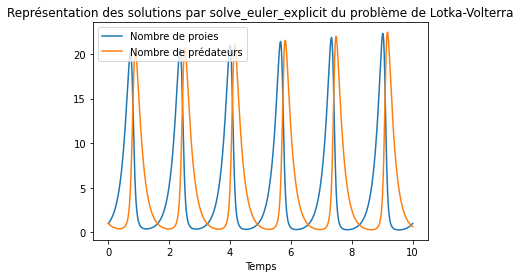

In [24]:
## Equation de Lotka-Volterra 

# Coefficients de prédation
a = 5
b = 1
g = 5
d = 1

#Résolution 
def f(t, x1, x2):
    return np.array([x1*(a-b*x2), -x2*(g-d*x1)])

time, sol = solve_euler_explicit(f, [1, 1], 0.001, 0, 10)
x1 = []
x2 = []
for x in sol:
    x1.append(x[0])
    x2.append(x[1])

plt.plot(time, x1, label ='Nombre de proies')
plt.plot(time, x2, label='Nombre de prédateurs')
plt.xlabel('Temps')
plt.title('Représentation des solutions par solve_euler_explicit du problème de Lotka-Volterra')
plt.legend()
plt.show()

# Représentation de H
def H(x1,x2):
    return d*x1 - g*np.log(x1) + b*x2 - a*np.log(x2)

# X, Y = np.meshgrid(x1, x2)
# Z = H(X, Y)
# fig=plt.figure()
# ax=fig.gca(projection='3d')
# surf = ax.plot_surface(X,Y,Z)
# plt.title('Représentation de H avec les résultats de solve_euler_explicit')
# plt.xlabel('Nombre de proies')
# plt.ylabel('Nombre de prédateurs')
# plt.show()

On remarque que le maximum local a tendance à augmenter au cours du temps. Cela semble peu fidèle à la réalité car la population devrait avoir un maximum local constant. 

### Question 8

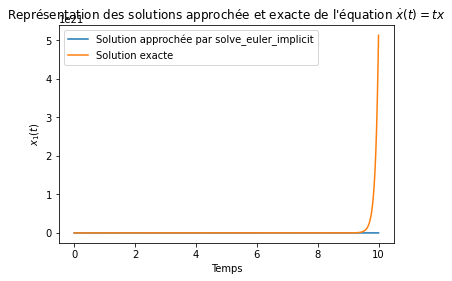

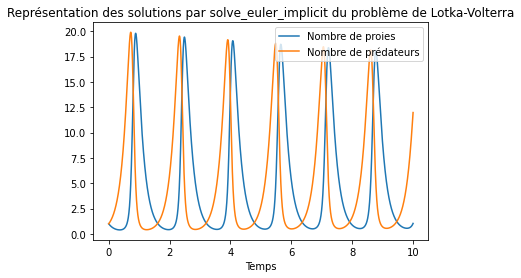

In [22]:
from scipy.optimize import fsolve

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    x =[x0]
    imax = int((tf-t0)/dt)-1
    i = 0
    t = [t0 + i*dt for i in range (imax+1)]
    while i < imax:
        xnew = fsolve(lambda y:y-x[i] + f(t[i+1], *y) * dt, x[i] + f(t[i], *x[i]) * dt)
        x.append(xnew)
        i += 1
    return t, x

## Test sur une fonction connue
def f1(t, x, y):
    return np.array([t*x, t*t*y])

time,sol = solve_euler_implicit(f1, [1,1], 0.001, 0, 10)
x1 = []
x2 = []
for x in sol:
    x1.append(x[0])
    x2.append(x[1])

x1true = [exp(t*t/2) for t in time]
x2true = [exp(t*t*t/3) for t in time]

plt.plot(time, x1, label ='Solution approchée par solve_euler_implicit')
plt.plot(time, x1true, label = 'Solution exacte')
plt.xlabel('Temps')
plt.ylabel('$x_1(t)$')
plt.title('Représentation des solutions approchée et exacte de l\'équation $\dot{x}(t) = tx$')
plt.legend()
plt.show()

## Application à l'équation de Lotka-Volterra 

# Coefficients de prédation
a = 5
b = 1
g = 5
d = 1

#Résolution 
def f(t, x1, x2):
    return np.array([x1*(a-b*x2), -x2*(g-d*x1)])

time, sol = solve_euler_implicit(f, [1, 1], 0.001, 0, 10)
x1 = []
x2 = []
for x in sol:
    x1.append(x[0])
    x2.append(x[1])

plt.plot(time, x1, label ='Nombre de proies')
plt.plot(time, x2, label='Nombre de prédateurs')
plt.xlabel('Temps')
plt.title('Représentation des solutions par solve_euler_implicit du problème de Lotka-Volterra')
plt.legend()
plt.show()

### Question 9

Le nouveau système est :

$$
\left\{ \begin{array}{cl}
\overset{.}{x_1} = x_1 (\alpha - \beta x_2) -u_1(x_1,x_2)(H(x_1,x_2)-H_0) \\
\overset{.}{x_2} = -x_2 (\gamma - \delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0)
\end{array} \right.
$$


$H$ est constante donc $\forall (x_1, x_2) \in \mathbb{R}_+^{2}, H(x_1, x_2) = H_0$ donc le nouveau système est identique au système de Lotka-Volterra. 


### Question 10

$$
H(x_1,x_2) = \delta x_1 - \gamma \ln{x_1} + \beta x_2 - \alpha \ln{x_2}
$$
La règle de la chaine donne :
$$
\frac{d (H(x_1,x_2)-H_0)}{dt}= \delta \overset{.}{x_1} - \gamma \frac{\overset{.}{x_1}}{x_1} + \beta \overset{.}{x_2} - \alpha \frac{\overset{.}{x_2}}{x_2}
$$

Soit en remplaçant à l'aide du nouveau système:
$$
\frac{d (H(x_1,x_2)-H_0)}{dt}= \delta (x_1 (\alpha - \beta x_2) -u_1(x_1,x_2)(H(x_1,x_2)-H_0)) - \gamma \frac{x_1 (\alpha - \beta x_2) -u_1(x_1,x_2)(H(x_1,x_2)-H_0)}{x_1} + \beta (-x_2 (\gamma - \delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0)) - \alpha \frac{-x_2 (\gamma - \delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0)}{x_2}
$$
Soit :
$$
\frac{d (H(x_1,x_2)-H_0)}{dt}= \Big(-\delta u_1(x_1,x_2) + \gamma \frac{u_1(x_1,x_2)}{x_1} - \beta u_2(x_1,x_2) + \alpha \frac{u_2(x_1,x_2)}{x_2} \Big) (H(x_1,x_2)-H_0)
$$
$$
\frac{d (H(x_1,x_2)-H_0)}{dt}= \Big( u_1(x_1,x_2)( \frac{\gamma}{x_1} -\delta) + u_2(x_1,x_2)(\frac{\alpha}{x_2} - \beta) \Big) (H(x_1,x_2)-H_0)
$$
Avec un $k$ positif arbitraire, on pose $ u_1(x_1,x_2) = k( \frac{\gamma}{x_1} -\delta) $ et $u_2(x_1,x_2) = k (\frac{\alpha}{x_2} - \beta)$.

On obtient alors l'expression demandé, vu que $\nabla H(x) = (\delta - \gamma / x_1 , \beta - \alpha / x_2)$:
$$
\frac{d (H(x_1,x_2)-H_0)}{dt}= -k \left\| \nabla H(x) \right\|^{2}(H(x_1,x_2)-H_0)
$$

On reconnait une équation différentielle homogène du premier ordre, ce qui donne :
$$
H(x_1,x_2)-H_0 = \lambda \exp{( A(t) )}
$$
Où la primitive $A(t)$ est donnée par :
$$
A(t)=\int_{*}^{t} -k \left\| \nabla H(x) \right\|^{2} dt =  -k \int_{*}^{t}  \left[  ( \frac{\gamma}{x_1} -\delta)^{2} +  (\frac{\alpha}{x_2} - \beta)^{2} \right] dt
$$
Or, on peut minorer la quantité $(\gamma/x_1-\delta)^2$ à l'aide de l'encadrement réalisé à la question 4 :
$$
0\lt x_1 \lt M \implies 1/x_1 \gt  1/M \implies \gamma/x_1-\delta >\gamma/M-\delta \implies (\gamma/x_1-\delta)^2 > (\gamma/M-\delta)^2 \ge 0
$$
Et de cette manière :
$$
-k\int_{*}^{t} (\gamma/x_1-\delta)^2 dt \lt -k \int_{*}^{t}(\gamma/M-\delta)^2 dt = -k (\gamma/M-\delta)^2 t \le  0
$$
En somme :
$$
A(t)=\int_{*}^{t} -k \left\| \nabla H(x) \right\|^{2} dt \lt -k \left[ (\gamma/M-\delta)^2 + (\alpha/M'-\beta)^2 \right] t
$$
Et $A(t)$ tend vers $-\infty$, ce qui montre que $H(x_1,x_2)$ tend vers $H_0$ de manière exponentielle.

### Question 11